In [335]:
import numpy as np
import pandas as pd
import re

In [336]:
df = pd.read_csv("surat_uncleaned.csv")
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


# Regex

In [337]:
df["BHK"] = df["property_name"].str.extract(r'(\d).BHK').astype(float)

In [338]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price,6.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price,4.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price,5.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price,6.0


In [339]:
df["Location"] = df["property_name"].str.extract(r'in\s+([\w\s]+)$',expand = False).str.strip()
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0,Dindoli Surat
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0,Althan Surat
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0,Pal Gam Surat
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0,Jahangirabad Surat
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0,NaN


In [340]:
df["area_type"] = df["areaWithType"].map({'Carpet Area': 1, 'Super Area': 2}).fillna(0).astype(int)
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location,area_type
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0,Dindoli Surat,1
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0,Althan Surat,2
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0,Pal Gam Surat,2
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0,Jahangirabad Surat,1
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0,NaN,2


In [341]:
df["area_sqft"] = df["square_feet"].str.extract(r'(\d+)').astype(float)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location,area_type,area_sqft
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0,Dindoli Surat,1,644.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0,Althan Surat,2,1278.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0,Pal Gam Surat,2,1173.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0,Jahangirabad Surat,1,700.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0,NaN,2,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price,6.0,NaN,1,2000.0
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price,4.0,NaN,2,3600.0
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price,5.0,NaN,1,2250.0
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price,6.0,NaN,1,3450.0


In [342]:
df["transaction_type"] = df["transaction"].map({'New Property': 1, 'Resale': 2}).fillna(0).astype(int)
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location,area_type,area_sqft,transaction_type
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0,Dindoli Surat,1,644.0,1
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0,Althan Surat,2,1278.0,1
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0,Pal Gam Surat,2,1173.0,2
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0,Jahangirabad Surat,1,700.0,1
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0,NaN,2,1250.0,0


In [343]:
df["ready_to_move"] = df["status"].apply(lambda x : 1 if "Ready to move" in str(x) else 0)

In [344]:
df["furnishing_level"] = df["furnishing"].map({'Unfurnished': 1, 'Semi-Furnished': 2, 'Fully Furnished': 3}).fillna(0).astype(int)
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,2.0,Dindoli Surat,1,644.0,1,0,1
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,2.0,Althan Surat,2,1278.0,1,0,1
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,2.0,Pal Gam Surat,2,1173.0,2,0,2
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,2.0,Jahangirabad Surat,1,700.0,1,0,1
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,2.0,NaN,2,1250.0,0,0,0


In [345]:
df["facing"] = df["facing"].astype("category").cat.codes

In [346]:
df["price_per_sqft"] = df["price_per_sqft"].str.replace(",","")

In [347]:
df["price_per_sqft"] = df["price_per_sqft"].str.replace("₹","")

In [348]:
df["price_per_sqft"] = df["price_per_sqft"].str.replace("per sqft","")
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,173,"Luxury project with basement parking, Solar ro...",2891,₹33.8 Lac,2.0,Dindoli Surat,1,644.0,1,0,1
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,156,2 And 3 BHK Luxurious Flat for Sell In New Alt...,3551,₹45.4 Lac,2.0,Althan Surat,2,1278.0,1,0,1
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,54,This affordable 2 BHK flat is situated along a...,3800,₹44.6 Lac,2.0,Pal Gam Surat,2,1173.0,2,0,2
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,54,2 BHK Flat For sell IN Jahangirabad Prime Loca...,3966,₹47 Lac,2.0,Jahangirabad Surat,1,700.0,1,0,1
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,12,"Multistorey Apartment for Sale in Palanpur, Su...",3600,₹45 Lac,2.0,NaN,2,1250.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,155,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price,6.0,NaN,1,2000.0,1,0,1
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,155,Superia is a premium residential project launc...,NaN,Call for Price,4.0,NaN,2,3600.0,1,0,1
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,98,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price,5.0,NaN,1,2250.0,1,0,1
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,99,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price,6.0,NaN,1,3450.0,1,0,1


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_name     4525 non-null   object 
 1   areaWithType      4525 non-null   object 
 2   square_feet       4525 non-null   object 
 3   transaction       4421 non-null   object 
 4   status            4524 non-null   object 
 5   floor             4480 non-null   object 
 6   furnishing        4185 non-null   object 
 7   facing            4525 non-null   int16  
 8   description       3154 non-null   object 
 9   price_per_sqft    4157 non-null   object 
 10  price             4525 non-null   object 
 11  BHK               3889 non-null   float64
 12  Location          2734 non-null   object 
 13  area_type         4525 non-null   int64  
 14  area_sqft         4519 non-null   float64
 15  transaction_type  4525 non-null   int64  
 16  ready_to_move     4525 non-null   int64  


In [350]:
df["price"] = df["price"].str.replace("₹","")

In [351]:
def price_converter(value):
    try:
        value = value.strip().split()
        if value[1] == "Lac":
            value[0] = float(value[0])
            converted_value = value[0] * 100000
        if value[1] == "Cr":
            value[0] = float(value[0])
            converted_value = value[0] * 10000000
        return converted_value
    except:
        return value

In [352]:
df["price_rs"] = df["price"].apply(price_converter)

In [353]:
df = df.drop(columns = ["property_name", "areaWithType", "square_feet", "transaction", "status", "floor", "furnishing", "description", "price_per_sqft","price"])

In [354]:
df

,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
0,173,2.0,Dindoli Surat,1,644.0,1,0,1,3380000.0
1,156,2.0,Althan Surat,2,1278.0,1,0,1,4540000.0
2,54,2.0,Pal Gam Surat,2,1173.0,2,0,2,4460000.0
3,54,2.0,Jahangirabad Surat,1,700.0,1,0,1,4700000.0
4,12,2.0,NaN,2,1250.0,0,0,0,4500000.0
...,...,...,...,...,...,...,...,...,...
4520,155,6.0,NaN,1,2000.0,1,0,1,"[Call, for, Price]"
4521,155,4.0,NaN,2,3600.0,1,0,1,"[Call, for, Price]"
4522,98,5.0,NaN,1,2250.0,1,0,1,"[Call, for, Price]"
4523,99,6.0,NaN,1,3450.0,1,0,1,"[Call, for, Price]"


In [355]:
df["price_rs"] = df["price_rs"].replace(['Call for Price'],np.nan)

In [356]:
# Ensure all entries in 'price' are strings
df['price_rs'] = df['price_rs'].astype(str)

# Remove 'Call for Price' from the strings
df['price_rs'] = df['price_rs'].str.replace("Call for Price", "", case=False).str.strip()

# Optional: Convert back to numeric, set errors='coerce' to turn non-numeric into NaN
df['price_rs'] = pd.to_numeric(df['price_rs'], errors='coerce')

# View the data
df


,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
0,173,2.0,Dindoli Surat,1,644.0,1,0,1,3380000.0
1,156,2.0,Althan Surat,2,1278.0,1,0,1,4540000.0
2,54,2.0,Pal Gam Surat,2,1173.0,2,0,2,4460000.0
3,54,2.0,Jahangirabad Surat,1,700.0,1,0,1,4700000.0
4,12,2.0,NaN,2,1250.0,0,0,0,4500000.0
...,...,...,...,...,...,...,...,...,...
4520,155,6.0,NaN,1,2000.0,1,0,1,NaN
4521,155,4.0,NaN,2,3600.0,1,0,1,NaN
4522,98,5.0,NaN,1,2250.0,1,0,1,NaN
4523,99,6.0,NaN,1,3450.0,1,0,1,NaN


In [357]:
Location_mode = df["Location"].mode()

In [358]:
df["Location"].fillna(Location_mode[0], inplace = True)
df

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\1292050248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Location"].fillna(Location_mode[0], inplace = True)


,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
0,173,2.0,Dindoli Surat,1,644.0,1,0,1,3380000.0
1,156,2.0,Althan Surat,2,1278.0,1,0,1,4540000.0
2,54,2.0,Pal Gam Surat,2,1173.0,2,0,2,4460000.0
3,54,2.0,Jahangirabad Surat,1,700.0,1,0,1,4700000.0
4,12,2.0,Vesu Surat,2,1250.0,0,0,0,4500000.0
...,...,...,...,...,...,...,...,...,...
4520,155,6.0,Vesu Surat,1,2000.0,1,0,1,NaN
4521,155,4.0,Vesu Surat,2,3600.0,1,0,1,NaN
4522,98,5.0,Vesu Surat,1,2250.0,1,0,1,NaN
4523,99,6.0,Vesu Surat,1,3450.0,1,0,1,NaN


In [359]:
mean_price_rs = int(df["price_rs"].mean())

In [360]:
df["price_rs"].fillna(mean_price_rs, inplace = True)

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\3892075943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price_rs"].fillna(mean_price_rs, inplace = True)


In [361]:
df

,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
0,173,2.0,Dindoli Surat,1,644.0,1,0,1,3380000.0
1,156,2.0,Althan Surat,2,1278.0,1,0,1,4540000.0
2,54,2.0,Pal Gam Surat,2,1173.0,2,0,2,4460000.0
3,54,2.0,Jahangirabad Surat,1,700.0,1,0,1,4700000.0
4,12,2.0,Vesu Surat,2,1250.0,0,0,0,4500000.0
...,...,...,...,...,...,...,...,...,...
4520,155,6.0,Vesu Surat,1,2000.0,1,0,1,13208237.0
4521,155,4.0,Vesu Surat,2,3600.0,1,0,1,13208237.0
4522,98,5.0,Vesu Surat,1,2250.0,1,0,1,13208237.0
4523,99,6.0,Vesu Surat,1,3450.0,1,0,1,13208237.0


In [378]:
df.iloc[1000:1020]

,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
1000,97,2.0,Nanpura Surat,1,600.0,2,0,1,2000000.0
1001,5,2.0,Pandesara Surat,0,700.0,0,0,0,1500000.0
1002,-1,2.0,Vesu Surat,2,400.0,2,0,0,4200000.0
1003,12,2.0,Bhatar Surat,2,1000.0,2,0,1,3800000.0
1004,1,2.0,Parvat Patiya Surat,2,700.0,2,0,2,2200000.0
1005,12,2.0,Jahangirabad Surat,2,1252.0,2,0,2,3700000.0
1006,0,2.0,Dumbhal Surat,2,925.0,2,0,2,2300000.0
1007,12,2.0,New citylight Surat,1,900.0,2,0,2,2700000.0
1008,-1,2.0,Kamrej Surat,0,1360.0,0,0,0,3500000.0
1009,0,1.0,Dabholi Surat,2,550.0,2,0,1,1100000.0


In [363]:
df.isnull().sum()

facing                0
BHK                 636
Location              0
area_type             0
area_sqft             6
transaction_type      0
ready_to_move         0
furnishing_level      0
price_rs              0
dtype: int64

In [364]:
mean_BHK = int(df["BHK"].mean())

In [365]:
df["price_rs"].fillna(mean_price_rs, inplace = True)

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\3892075943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price_rs"].fillna(mean_price_rs, inplace = True)


In [366]:
df.isnull().sum()

facing                0
BHK                 636
Location              0
area_type             0
area_sqft             6
transaction_type      0
ready_to_move         0
furnishing_level      0
price_rs              0
dtype: int64

In [367]:
mean_BHK = int(df["BHK"].mean())

In [368]:
mean_area_sqft = int(df["area_sqft"].mean())

In [369]:
df["BHK"].fillna(mean_BHK, inplace = True)

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\1891951199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BHK"].fillna(mean_BHK, inplace = True)


In [370]:
df["area_sqft"].fillna(mean_area_sqft, inplace = True)

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\782065501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["area_sqft"].fillna(mean_area_sqft, inplace = True)


In [371]:
df.isnull().sum().sum()

np.int64(0)

In [372]:
df

,facing,BHK,Location,area_type,area_sqft,transaction_type,ready_to_move,furnishing_level,price_rs
0,173,2.0,Dindoli Surat,1,644.0,1,0,1,3380000.0
1,156,2.0,Althan Surat,2,1278.0,1,0,1,4540000.0
2,54,2.0,Pal Gam Surat,2,1173.0,2,0,2,4460000.0
3,54,2.0,Jahangirabad Surat,1,700.0,1,0,1,4700000.0
4,12,2.0,Vesu Surat,2,1250.0,0,0,0,4500000.0
...,...,...,...,...,...,...,...,...,...
4520,155,6.0,Vesu Surat,1,2000.0,1,0,1,13208237.0
4521,155,4.0,Vesu Surat,2,3600.0,1,0,1,13208237.0
4522,98,5.0,Vesu Surat,1,2250.0,1,0,1,13208237.0
4523,99,6.0,Vesu Surat,1,3450.0,1,0,1,13208237.0


In [373]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\3445591595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "BHK", palette = "colorblind")


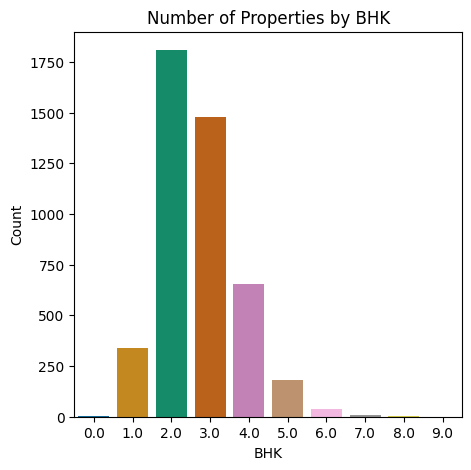

In [374]:
#Plot: Count of properties by bhk
plt.figure(figsize = (5, 5))
sns.countplot(data = df, x = "BHK", palette = "colorblind")
plt.title("Number of Properties by BHK")
plt.xlabel("BHK")
plt.ylabel("Count")
plt.show()

C:\Users\Ikenna George\AppData\Local\Temp\ipykernel_7980\4164099075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "area_type", palette = "dark")


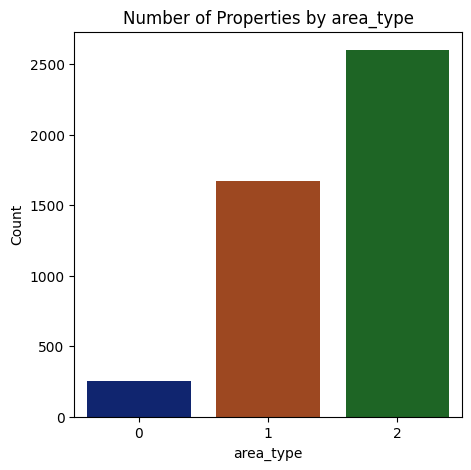

In [375]:
#Plot: Count of properties by bhk
plt.figure(figsize = (5, 5))
sns.countplot(data = df, x = "area_type", palette = "dark")
plt.title("Number of Properties by area_type")
plt.xlabel("area_type")
plt.ylabel("Count")
plt.show()

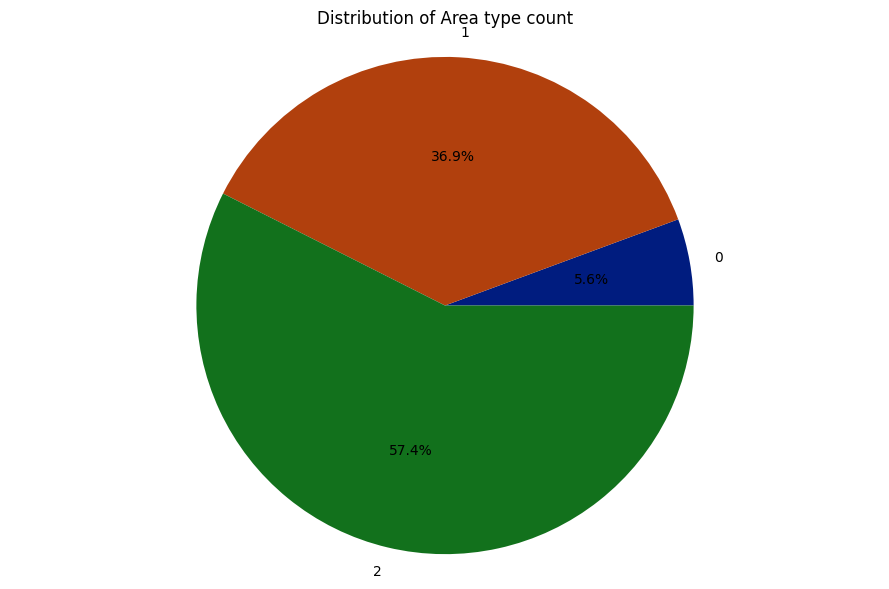

In [376]:
# Area_type count
area_type_count = df["area_type"].value_counts().sort_index()

# Draw a pie chart
plt.figure(figsize = (9, 6))
plt.pie(
    area_type_count,
    labels = area_type_count.index.astype(int),
    autopct = '%1.1f%%',
    colors = sns.color_palette('dark')
)
plt.title('Distribution of Area type count')
plt.axis('equal') # Perfect circle
plt.tight_layout()
plt.show()
